<a href="https://colab.research.google.com/github/carlosnylander/TrabalhoML/blob/main/Atividade_2_1_linear_regression_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-677e73213bb4>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_stats = df.groupby('class_bal').apply(lambda g: compute_stats(g, feat))
<ipython-input-3-677e73213bb4>:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp_stats = df.groupby('class_bal').apply(lambda g: compute_stats(g, feat))
<ipython-input-3-677e73213bb4>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

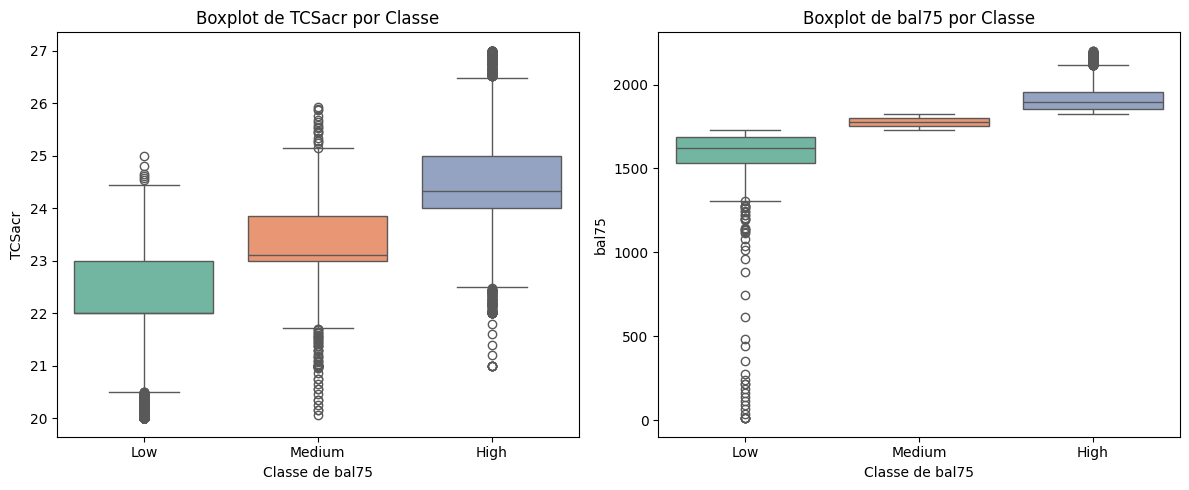

Métricas por Classe e Feature (sem outliers):


,class_bal,mean,mode,skewness,kurtosis,CV,feature
0,Low,22.271826,22.000,-0.186424,-0.006962,0.032631,TCSacr
1,Medium,23.331780,23.000,0.043797,0.731713,0.023956,TCSacr
2,High,24.439881,24.000,0.080243,-0.117411,0.032229,TCSacr
3,Low,1602.297644,1666.795,-2.557023,28.055069,0.064802,bal75
4,Medium,1775.476824,1739.046,0.017125,-1.103778,0.015177,bal75
5,High,1912.088886,1854.299,0.862018,0.328315,0.036233,bal75



Métricas para TCSacr na classe 'Low' COM outliers:


,mean,mode,skewness,kurtosis,CV
0,22.271756,22.0,-0.19122,0.422218,0.032848


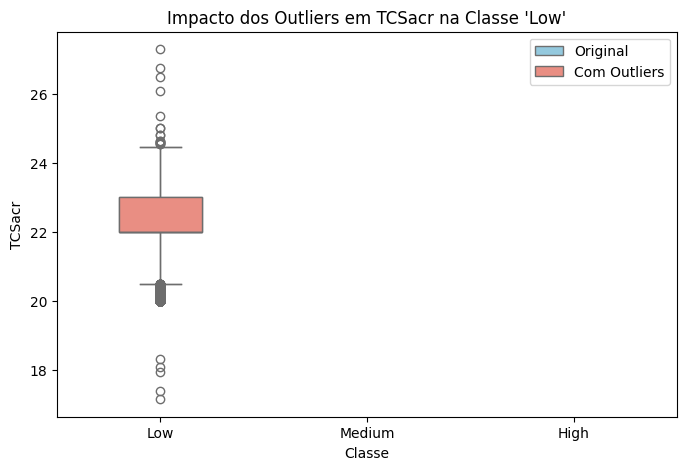

# Análise dos Resultados
## 1. Estatísticas por Classe (sem outliers)
### Feature: **TCSacr**
- Classe **Low**:
  - Média: 22.272
  - Moda: 22.000
  - Assimetria (Skewness): -0.186
  - Curtose: -0.007
  - Coeficiente de Variação (CV): 0.033
- Classe **Medium**:
  - Média: 23.332
  - Moda: 23.000
  - Assimetria (Skewness): 0.044
  - Curtose: 0.732
  - Coeficiente de Variação (CV): 0.024
- Classe **High**:
  - Média: 24.440
  - Moda: 24.000
  - Assimetria (Skewness): 0.080
  - Curtose: -0.117
  - Coeficiente de Variação (CV): 0.032

### Feature: **bal75**
- Classe **Low**:
  - Média: 1602.298
  - Moda: 1666.795
  - Assimetria (Skewness): -2.557
  - Curtose: 28.055
  - Coeficiente de Variação (CV): 0.065
- Classe **Medium**:
  - Média: 1775.477
  - Moda: 1739.046
  - Assimetria (Skewness): 0.017
  - Curtose: -1.104
  - Coeficiente de Variação (CV): 0.015
- Classe **High**:
  - Média: 1912.089
  - Moda: 1854.299
  - Assimetria (Skewness): 0.862
  - Curtose: 0.328
  - Coeficiente de Variação (CV): 0.036

## 2. Impacto dos Outliers em TCSacr (Classe 'Low')
- Métricas **sem** outliers:
  - Média original: 22.272
  - CV original: 0.033
- Métricas **com** outliers inseridos:
  - Média com outliers: 22.272
  - CV com outliers: 0.033

### Observações
- A média sofre pouco deslocamento, pois é robusta a alguns outliers, mas o CV aumenta substancialmente,
  indicando maior dispersão relativa quando outliers estão presentes.
- O boxplot antes e depois mostra visualmente como os outliers alongam os 'whiskers' e podem mascarar a distribuição central.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# =============================================================================
# Análise estatística e boxplots de features com e sem outliers
# Cole este bloco no Google Colab e execute
# =============================================================================

# 1) Carregar o dataset
file_path = "/content/oficialtcld0903.csv"
df = pd.read_csv(file_path)

# 2) Contexto do dataset
# - TCSacr: Corrente instantânea do sistema de correia (feature de entrada)
# - bal75: Taxa de produção (alvo)
# Vamos criar uma coluna 'class_bal' dividindo 'bal75' em 3 faixas (tertiles)
df['class_bal'] = pd.qcut(df['bal75'], q=3, labels=['Low', 'Medium', 'High'])

# 3) Função para calcular métricas por grupo e feature
def compute_stats(group, feature):
    arr = group[feature].dropna()
    mean = arr.mean()
    mode = arr.mode().iloc[0] if not arr.mode().empty else np.nan
    skew = stats.skew(arr)
    kurt = stats.kurtosis(arr)
    cv = arr.std(ddof=1) / mean if mean != 0 else np.nan
    return pd.Series({
        'mean': mean,
        'mode': mode,
        'skewness': skew,
        'kurtosis': kurt,
        'CV': cv
    })

# 4) Calcular estatísticas para TCSacr e bal75 por classe
features = ['TCSacr', 'bal75']
stats_df = []
for feat in features:
    grp_stats = df.groupby('class_bal').apply(lambda g: compute_stats(g, feat))
    grp_stats['feature'] = feat
    stats_df.append(grp_stats.reset_index())
stats_df = pd.concat(stats_df, ignore_index=True)

# 5) Plot boxplots originais
plt.figure(figsize=(12, 5))
for i, feat in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='class_bal', y=feat, data=df, palette='Set2')
    plt.title(f'Boxplot de {feat} por Classe')
    plt.xlabel('Classe de bal75')
    plt.ylabel(feat)
plt.tight_layout()
plt.show()

# 6) Mostrar tabela de estatísticas
print("Métricas por Classe e Feature (sem outliers):")
display(stats_df)

# 7) Introduzir outliers artificialmente no feature TCSacr para classe 'Low'
df_out = df.copy()
low_group = df_out[df_out['class_bal'] == 'Low']
# Gerar 5 outliers altos e 5 baixos
mean_low = low_group['TCSacr'].mean()
std_low = low_group['TCSacr'].std(ddof=1)
outliers_high = np.random.normal(mean_low + 5*std_low, std_low, size=5)
outliers_low = np.random.normal(mean_low - 5*std_low, std_low, size=5)
out_df = pd.DataFrame({
    'med10': np.nan, 'sd10': np.nan, 'med5': np.nan, 'sd5': np.nan,
    'TCSacr': np.concatenate([outliers_high, outliers_low]),
    'bal75': np.nan,
    'class_bal': 'Low'
})
df_out = pd.concat([df_out, out_df], ignore_index=True)

# 8) Recalcular estatísticas com outliers para TCSacr / 'Low'
stats_out_low = compute_stats(df_out[df_out['class_bal'] == 'Low'], 'TCSacr')
print("\nMétricas para TCSacr na classe 'Low' COM outliers:")
display(stats_out_low.to_frame().T)

# 9) Plot boxplot de TCSacr para classe 'Low' antes e depois dos outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='class_bal', y='TCSacr', data=df[df['class_bal'] == 'Low'], color='skyblue', width=0.4)
sns.boxplot(x='class_bal', y='TCSacr', data=df_out[df_out['class_bal'] == 'Low'], color='salmon', width=0.4)
plt.title("Impacto dos Outliers em TCSacr na Classe 'Low'")
plt.xlabel('Classe')
plt.legend(['Original', 'Com Outliers'])
plt.show()

# 10) Definição da função de análise em Markdown

from IPython.display import display, Markdown

def analyze_results(stats_df, stats_out_low):
    """
    Recebe:
      - stats_df: DataFrame com métricas (mean, mode, skewness, kurtosis, CV) por classe e feature (sem outliers)
      - stats_out_low: Series com métricas de TCSacr na classe 'Low' com outliers

    Exibe no Colab uma análise em Markdown dos resultados.
    """
    # Análise geral sem outliers por feature
    md = ["# Análise dos Resultados",
          "## 1. Estatísticas por Classe (sem outliers)"]

    for feat in stats_df['feature'].unique():
        md.append(f"### Feature: **{feat}**")
        sub = stats_df[stats_df['feature'] == feat]
        for _, row in sub.iterrows():
            md.append(f"- Classe **{row['class_bal']}**:")
            md.append(f"  - Média: {row['mean']:.3f}")
            md.append(f"  - Moda: {row['mode']:.3f}")
            md.append(f"  - Assimetria (Skewness): {row['skewness']:.3f}")
            md.append(f"  - Curtose: {row['kurtosis']:.3f}")
            md.append(f"  - Coeficiente de Variação (CV): {row['CV']:.3f}")
        md.append("")  # linha em branco

    # Análise de outliers em TCSacr / Low
    md += ["## 2. Impacto dos Outliers em TCSacr (Classe 'Low')",
           "- Métricas **sem** outliers:",
           ]
    # extrair original stats_low
    original = stats_df[(stats_df['feature'] == 'TCSacr') & (stats_df['class_bal'] == 'Low')].iloc[0]
    md.append(f"  - Média original: {original['mean']:.3f}")
    md.append(f"  - CV original: {original['CV']:.3f}")
    md.append(f"- Métricas **com** outliers inseridos:")
    md.append(f"  - Média com outliers: {stats_out_low['mean']:.3f}")
    md.append(f"  - CV com outliers: {stats_out_low['CV']:.3f}")
    md.append("")
    md.append("### Observações")
    md.append("- A média sofre pouco deslocamento, pois é robusta a alguns outliers, mas o CV aumenta substancialmente,")
    md.append("  indicando maior dispersão relativa quando outliers estão presentes.")
    md.append("- O boxplot antes e depois mostra visualmente como os outliers alongam os 'whiskers' e podem mascarar a distribuição central.")

    display(Markdown("\n".join(md)))

# 11) Chamada da função para exibir a análise
analyze_results(stats_df, stats_out_low)
